<h3> Data Analysis Using Python </h3>


<h4> Import python liberaries, read csv file into DataFrame. </h4>

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("adult_census_data.csv")

<h4> Getting basic info from the dataset </h4>

In [192]:
# getting basic info
df.columns, df.index, df.dtypes, df.isna().any()

(Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
        ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
        ' 40', ' United-States', ' <=50K'],
       dtype='object'),
 RangeIndex(start=0, stop=32560, step=1),
 39                 int64
  State-gov        object
  77516             int64
  Bachelors        object
  13                int64
  Never-married    object
  Adm-clerical     object
  Not-in-family    object
  White            object
  Male             object
  2174              int64
  0                 int64
  40                int64
  United-States    object
  <=50K            object
 dtype: object,
 39                False
  State-gov        False
  77516            False
  Bachelors        False
  13               False
  Never-married    False
  Adm-clerical     False
  Not-in-family    False
  White            False
  Male             False
  2174             False
  0                False
  40               False
  Uni

<b> Q1. After importing the adult_census_data.csv file, please filter this to include only the following criteria: </b>
<p>

<li> State-Gov</li>
<li> Bachelors </li>
<li> Never-Married </li>
<li> Adm-Clerical </li> 
<li> Not-in-familiy </li>
<li> White </li>
<li> Male </li> 
<li> United States </li>
<li> <=50K </li> 



<b> Write code below </b>

<h4> Data munging </h4>

In [197]:
# perform remove whitespace in columns
df.columns=df.columns.str.strip()

In [199]:
# Delete undesired cols and make it permanent as required.
df.drop(columns=['39','77516', '13',
       '2174', '0',
       '40'], inplace=True)

In [201]:
# print out the head to do varification 
df.head(2)

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K


In [203]:
# Also check the columns names to verify no more whitespace
df.columns

Index(['State-gov', 'Bachelors', 'Never-married', 'Adm-clerical',
       'Not-in-family', 'White', 'Male', 'United-States', '<=50K'],
      dtype='object')

<b> Currently, the dataframe has the following column names: </b>

[' State-gov', ' Bachelors', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K']
       
     
<b> Q2. We need to re-name all the newly filtered columns in the pandas DataFrame to the following: </b>

Employment Type, Degree Status, Marriage-Status, Job-Role, Family-Role, Ethnicity, Gender, Country, Earnings

E.g. State-Gov becomes Employment Type, Bachelors becomes Degree Status, etc.

<b> Write code below </b>

In [212]:
# Perform changing the column's name as required.
df.rename(columns={'State-gov':'Employment Type', 'Bachelors':'Degree Status', 'Never-married':'Marriage-Status','Adm-clerical':'Job-Role',
                         'Not-in-family':'Family-Role', 'White':'Ethnicity', 'Male':'Gender','United-States':'Country',
                          '<=50K':'Earnings'}, inplace=True)

<b> Q3. The Job Role Columns holds the job information for each individual in this census snapshot. Using this column, create a Bar Chart that shows the count of 'Unique' Jobs per Job Group in the "Job-Role" Column in ascending order.</b>


<b> Write code below </b>

<Axes: xlabel='Job-Role'>

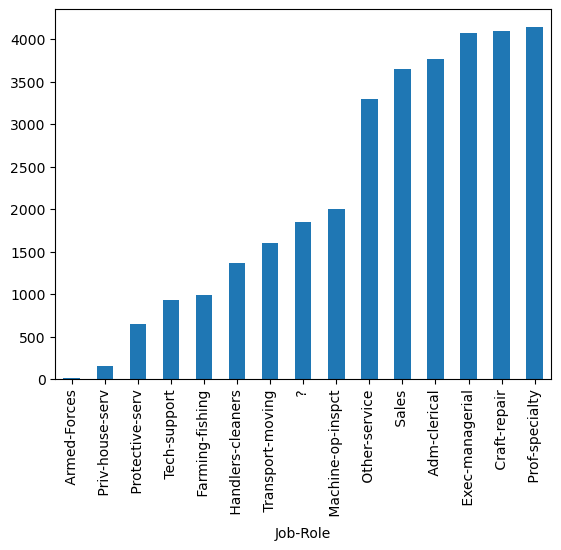

In [267]:
# Perform grouping and unique value counts, then sort the values as desire.
# Visulize the values.
jobs=df.groupby('Job-Role')['Job-Role'].value_counts().sort_values()
jobs.plot(kind='bar')


In [299]:
df.shape

(32560, 9)

In [342]:
# Checking leading/Training whitespace to ensure query successful.
df['Degree Status'] = df['Degree Status'].str.strip()
df['Earnings'] = df['Earnings'].str.strip()

<b> Q4. create two bar plots as per below that show:
    
    1) The number of individuals who have a High School Graduate Diploma AND earn <=50K in the United States
    2) The number of individuals who have a High School Graduate Diploma AND earn >50K in the United States 

Please looking specifically at the *Job Role* column

In [345]:
# Perform verification of unique values and data type
print(df['Degree Status'].unique())
print(df['Earnings'].unique())
print(df.dtypes)

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['<=50K' '>50K']
Employment Type    object
Degree Status      object
Marriage-Status    object
Job-Role           object
Family-Role        object
Ethnicity          object
Gender             object
Country            object
Earnings           object
dtype: object


<b> Write code below </b>

In [403]:
# Perform a query to filter rows with high school grad with earnings less than 50k
q1= df[(df['Degree Status'] == 'HS-grad') & (df['Earnings'] == '<=50K')]
# validate the table
q1.shape

(8826, 9)

<Axes: xlabel='Job-Role'>

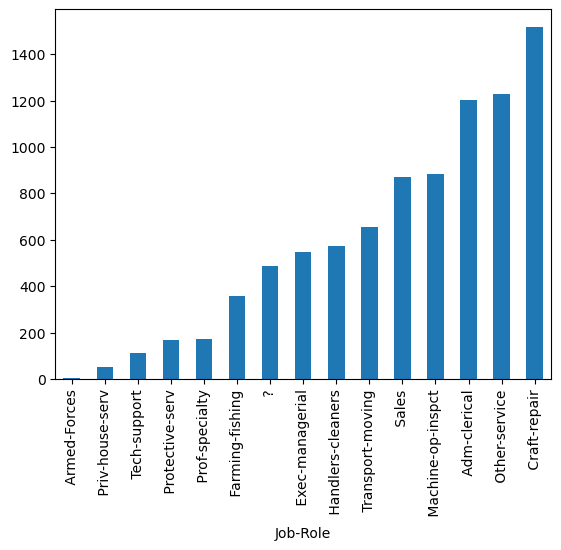

In [350]:
# Visulize numbers of high school grads with less than 50k earnings
q1_g= q1.groupby('Job-Role')['Job-Role'].value_counts().sort_values()
q1_g.plot(kind='bar')

In [352]:
# Perform a query to filter rows with high school grad with earnings more than 50k
q2= df[(df['Degree Status'] == 'HS-grad') & (df['Earnings'] == '>50K')]
q2.shape

(1675, 9)

<Axes: xlabel='Job-Role'>

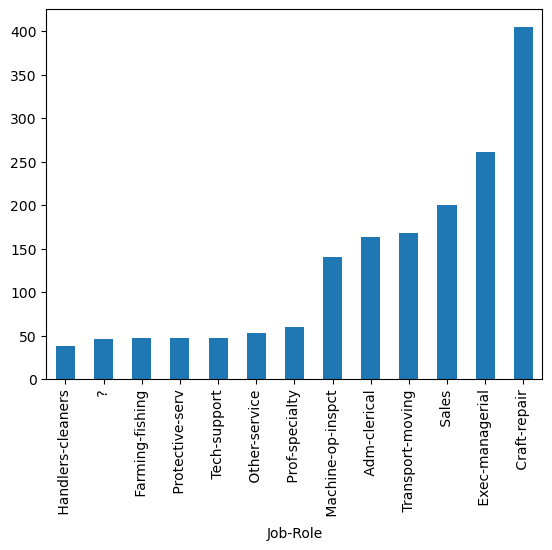

In [354]:
# Visulize numbers of high school grads wih more than 50k earnings
q2_g= q2.groupby('Job-Role')['Job-Role'].value_counts().sort_values()
q2_g.plot(kind='bar')

<H3> Challenge Question </H3>

<b> Q5. Which Job Role has the highest <i> proportion </i> of individuals who earn >50K? </b>

<b> Write code below </b>


In [374]:
# Firstly, query rows with earnings more than 50K, and validate the number
q3 = df[df['Earnings']== '>50K']
q3.shape

(7841, 9)

<Axes: xlabel='Job-Role'>

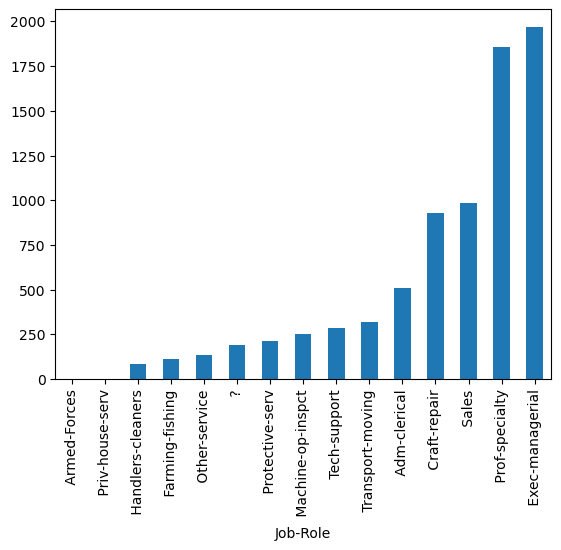

In [378]:
# count value based on job roles, and visualize the findings.
q3_g = q3.groupby('Job-Role')['Job-Role'].value_counts().sort_values()
q3_g.plot(kind='bar')


<h4>Based on above graph, Exec-managerial job role has the highest portion whose earnings is more than 50K.</h4> 
<h4>                       End of Project </h4> 
